In [1]:
% load_ext autoreload
% autoreload 2

In [2]:
from chromo import eb
from chromo.utils import poly_detrend, background_correction
import numpy as np

In [167]:
import chromo

In [3]:
import matplotlib.pyplot as plt
import lightkurve as lk
from scipy.interpolate import interp1d
from astropy.io import fits

from copy import deepcopy

In [377]:
from astropy.convolution import convolve, Box2DKernel

In [12]:
import os
plt.style.use(lk.MPLSTYLE)

In [5]:
dp = lk.search_tesscut('del Pic').download(cutout_size=[30, 30], quality_bitmask=None)

/Users/ch/K2/repos/lightkurve/lightkurve/search.py:144: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


In [479]:
zp = lk.search_tesscut('Zet Phe').download(cutout_size=[60, 60], quality_bitmask=None)

Calculating Pixel Light Curves: 100%|██████████| 30/30 [00:02<00:00, 12.21it/s]
INFO:chromo.eb:Building Normalized Flux Animation
INFO:chromo.eb:Building Residual Flux Animation
/Users/ch/Hacks/TESSparty/chromo/chromo/eb.py:134: RuntimeWarning: divide by zero encountered in true_divide
  plt.figure()


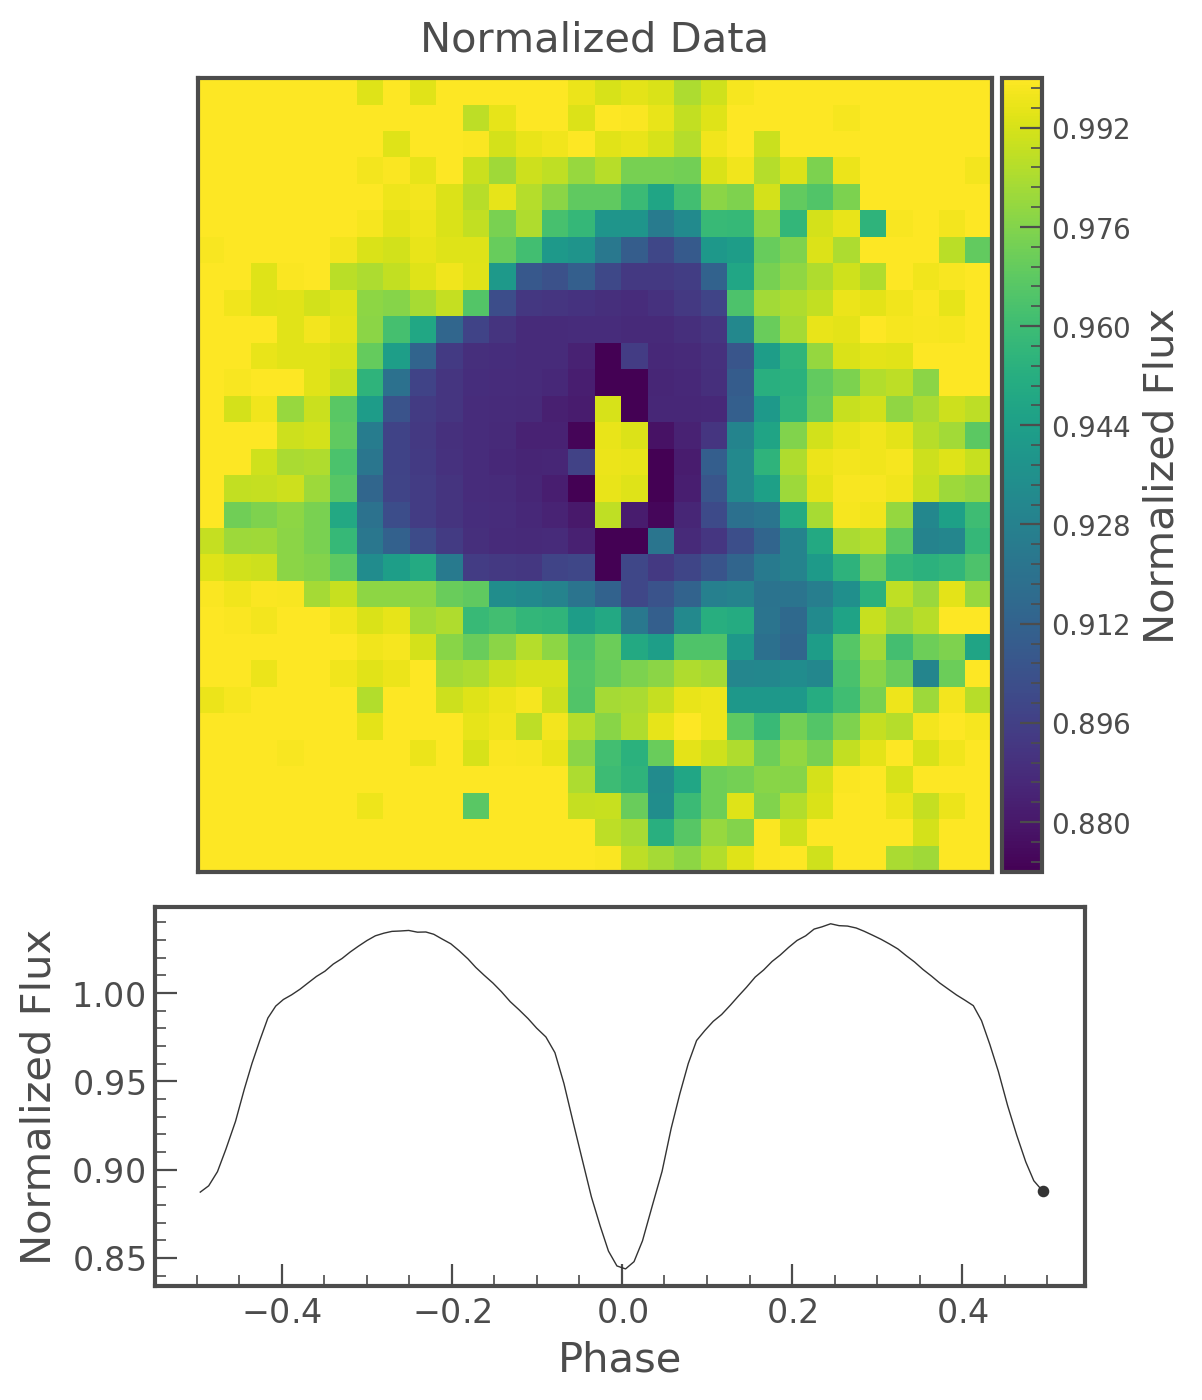

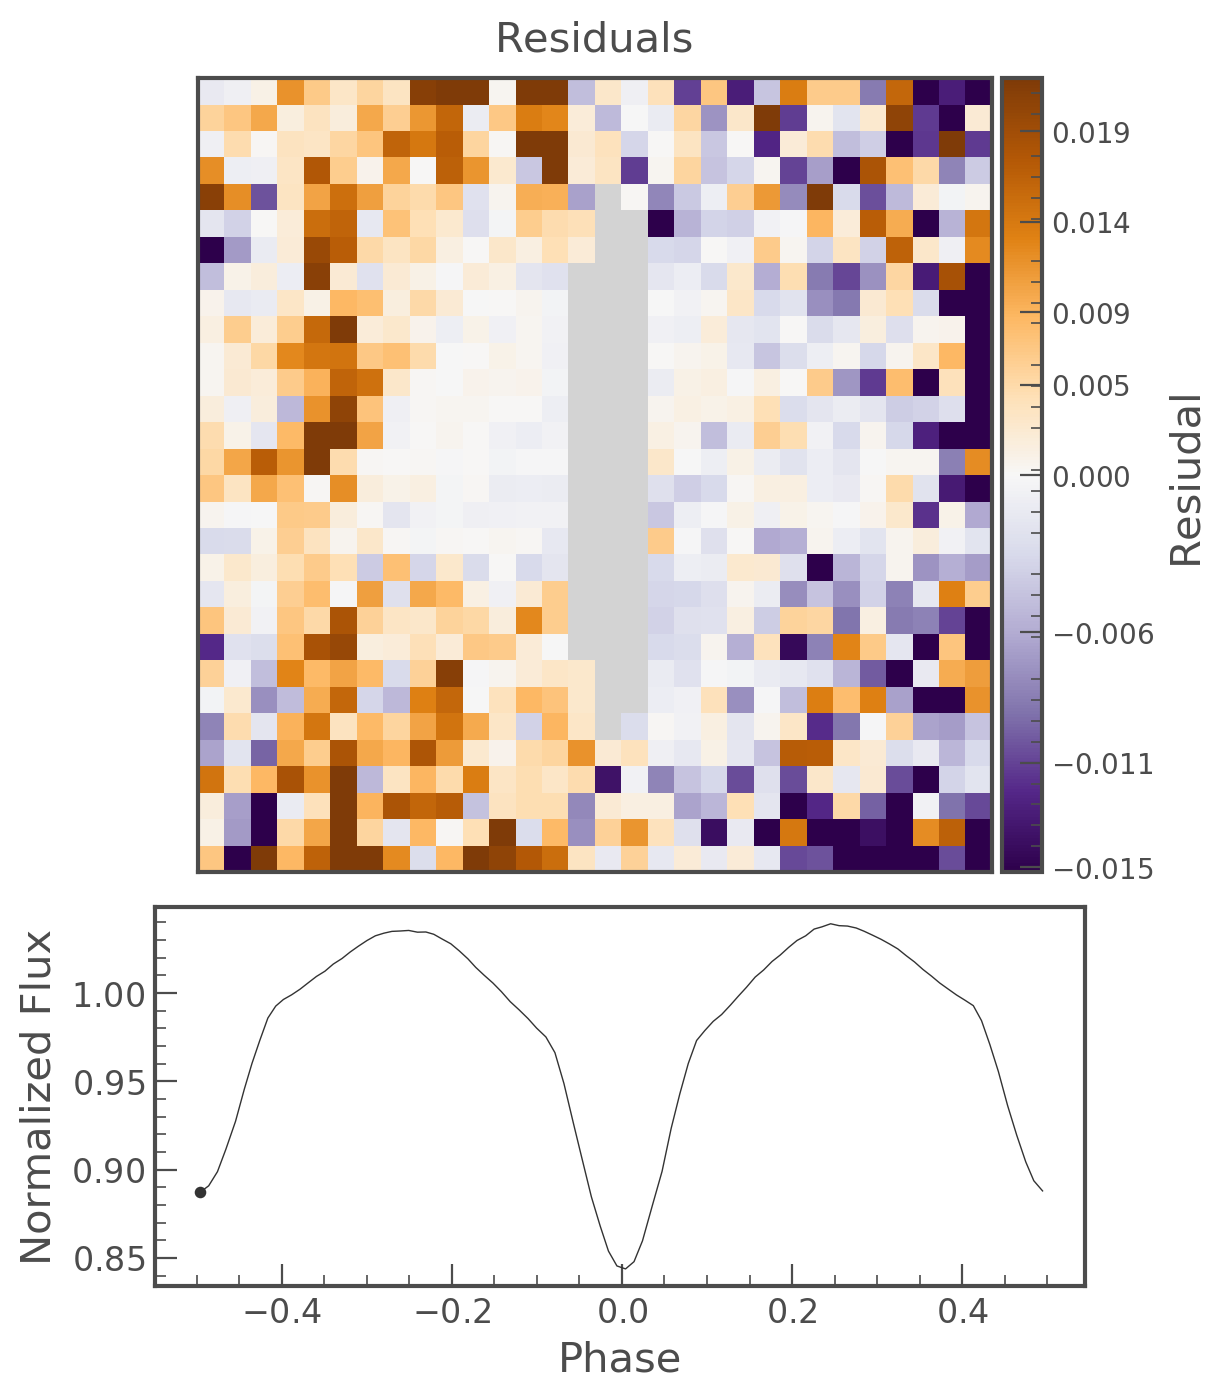

In [539]:
eb.analyze(dp, 1.672794, 0.5253266, name='DeltaPic')

Calculating Pixel Light Curves: 100%|██████████| 60/60 [00:12<00:00,  4.97it/s]
INFO:chromo.eb:	Building Normalized Flux Animation
INFO:chromo.eb:	Building Residual Flux Animation


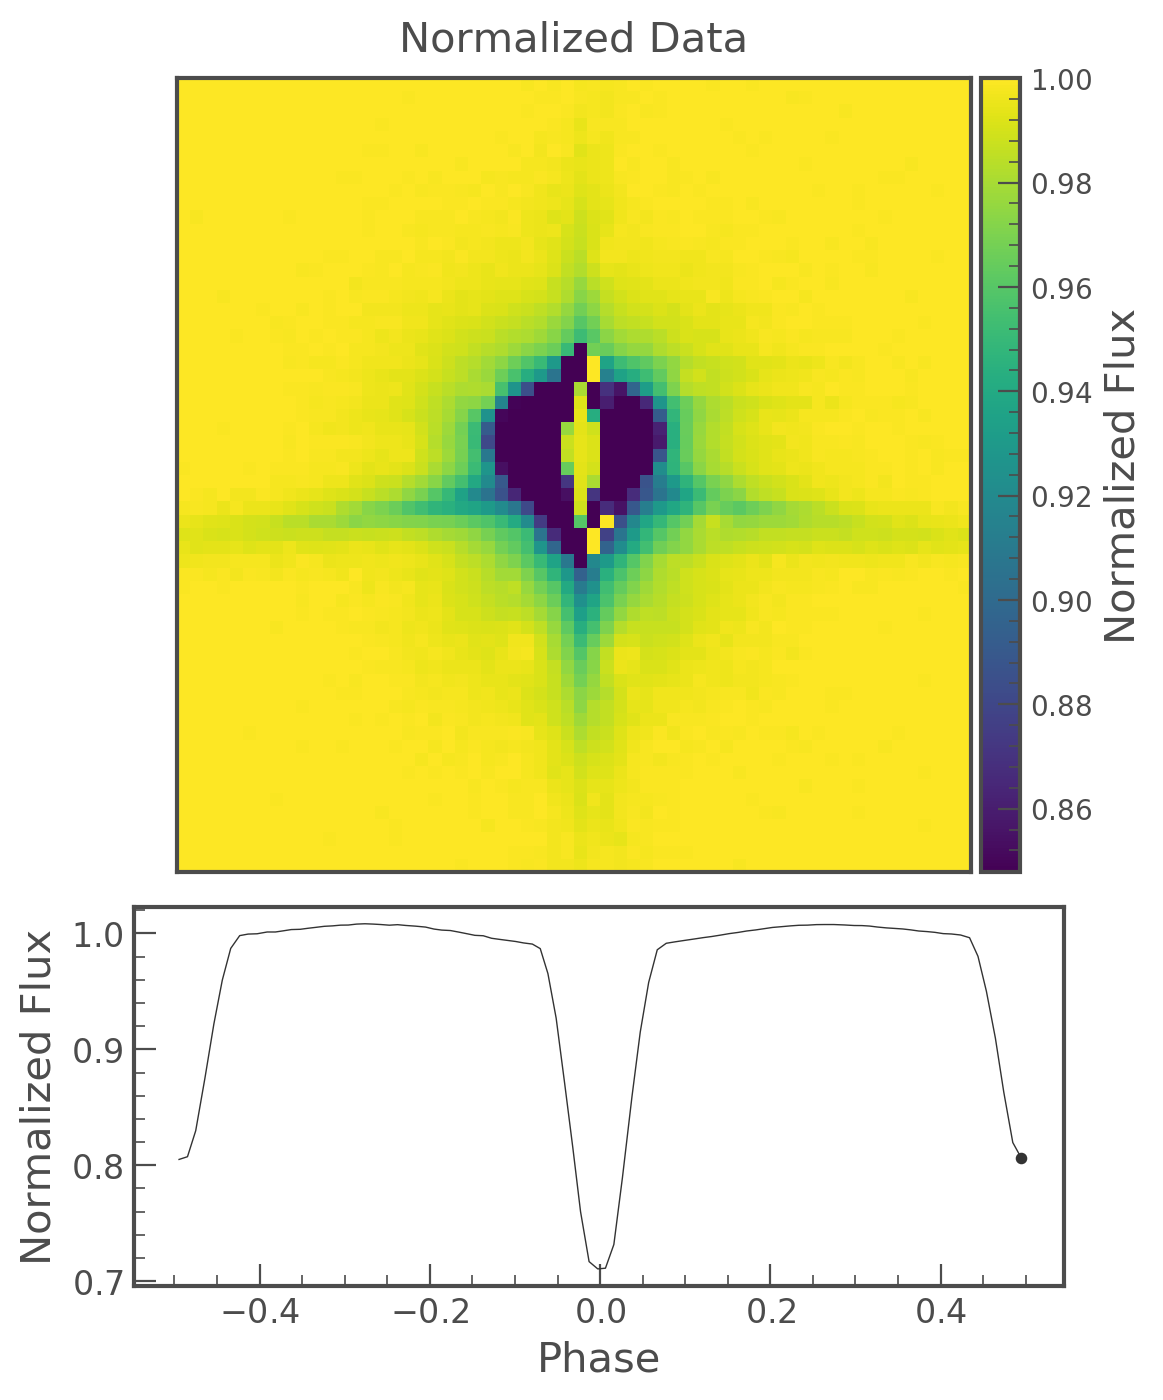

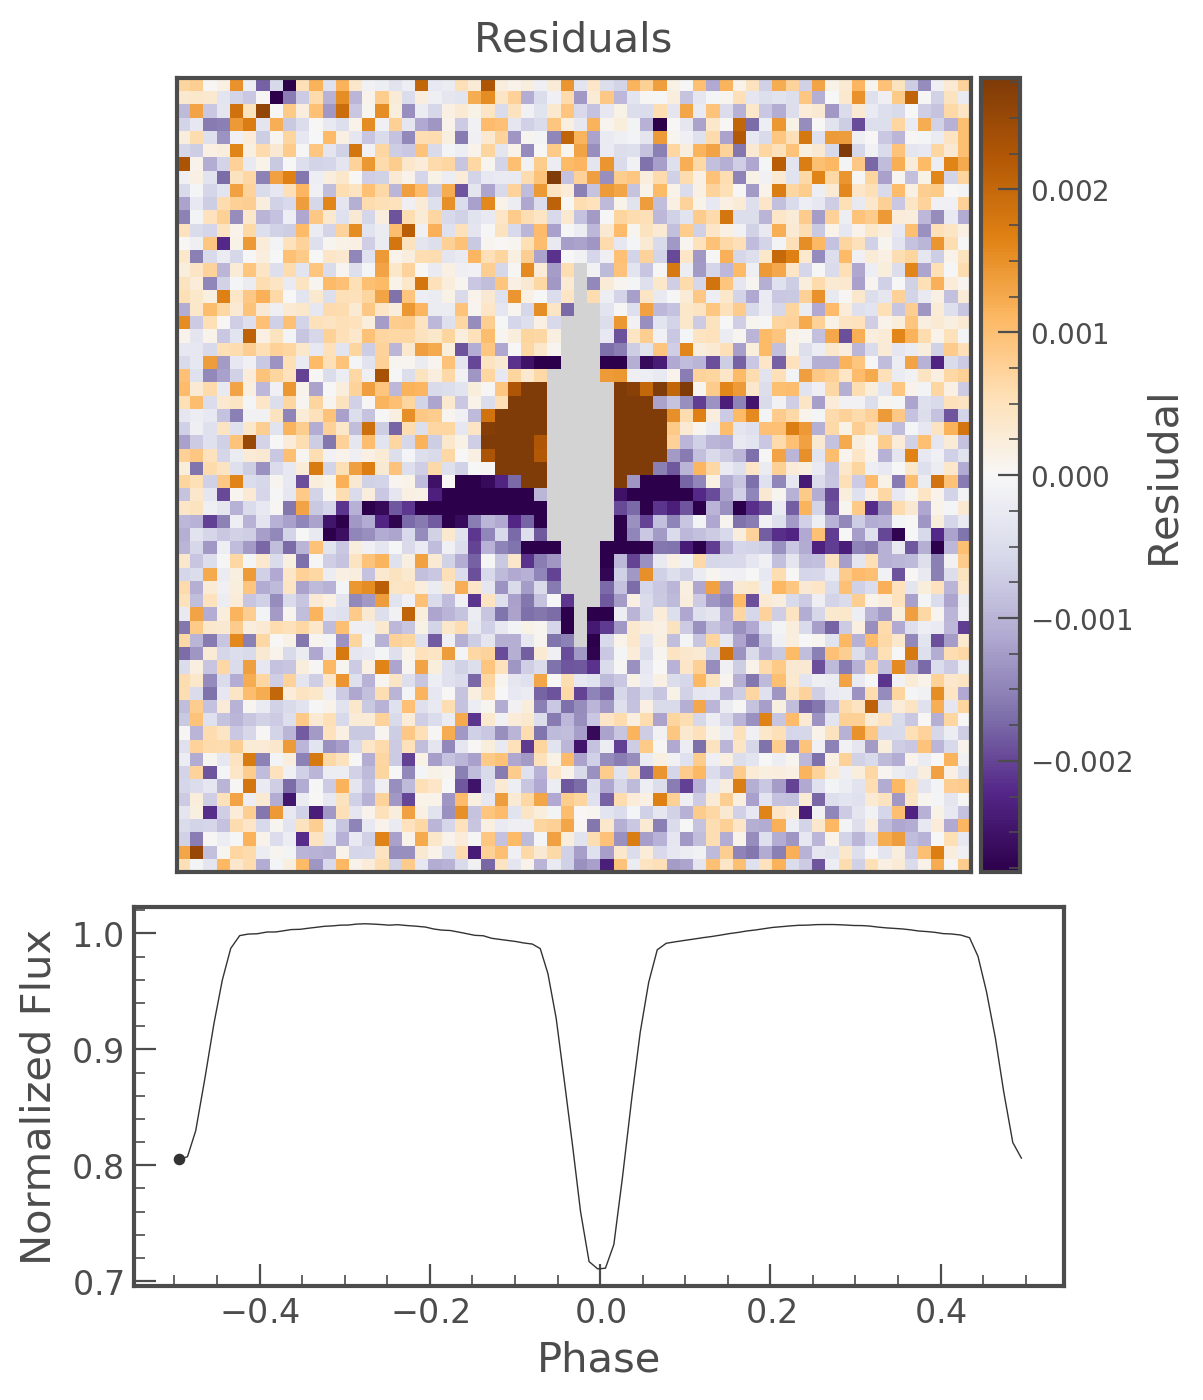

In [542]:
eb.analyze(zp, 1.669530708135147, 0.7945727531770768, name='ZetaPhe')

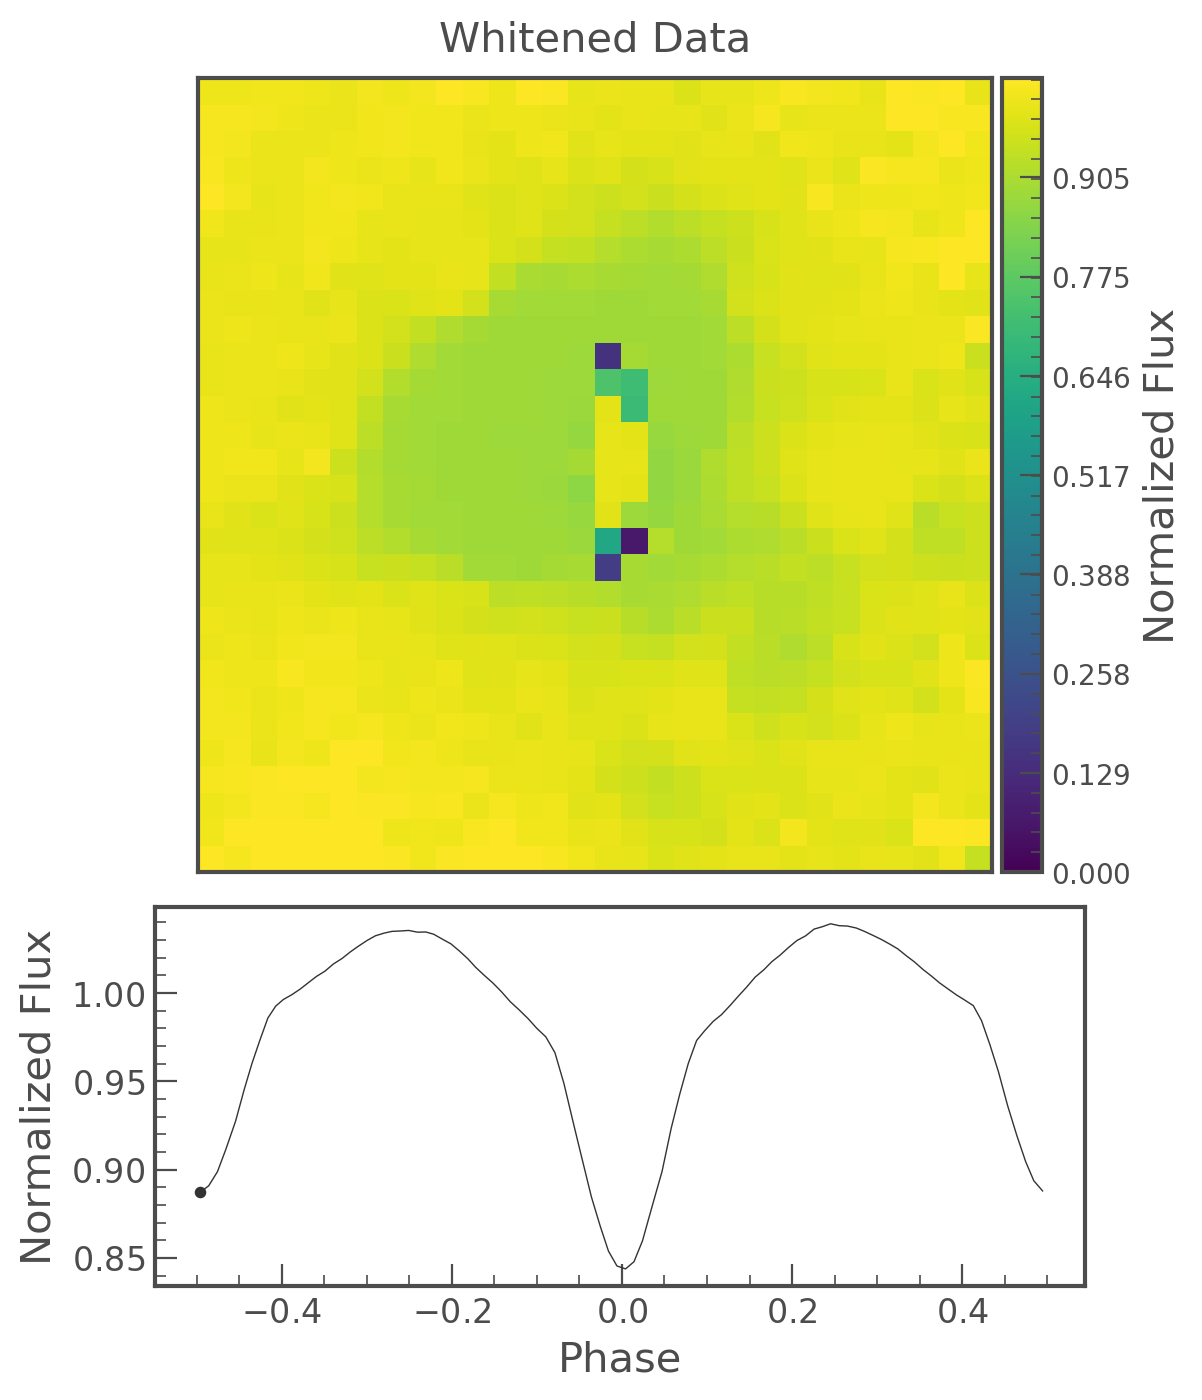

In [469]:
aper = (model[50] < 0.95) & (model[50] > 0.8)
vmin, vmax = np.min([0, np.nanpercentile(model[:, aper], 5)]), np.nanmax([0, np.nanpercentile(model[:, aper], 95)])

chromo.utils.movie(data, ph, fl, cmap='viridis', vmin=vmin, vmax=vmax, out='DeltaPic.mp4',
                   title='Whitened Data', cbar_label='Normalized Flux')

/Users/ch/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


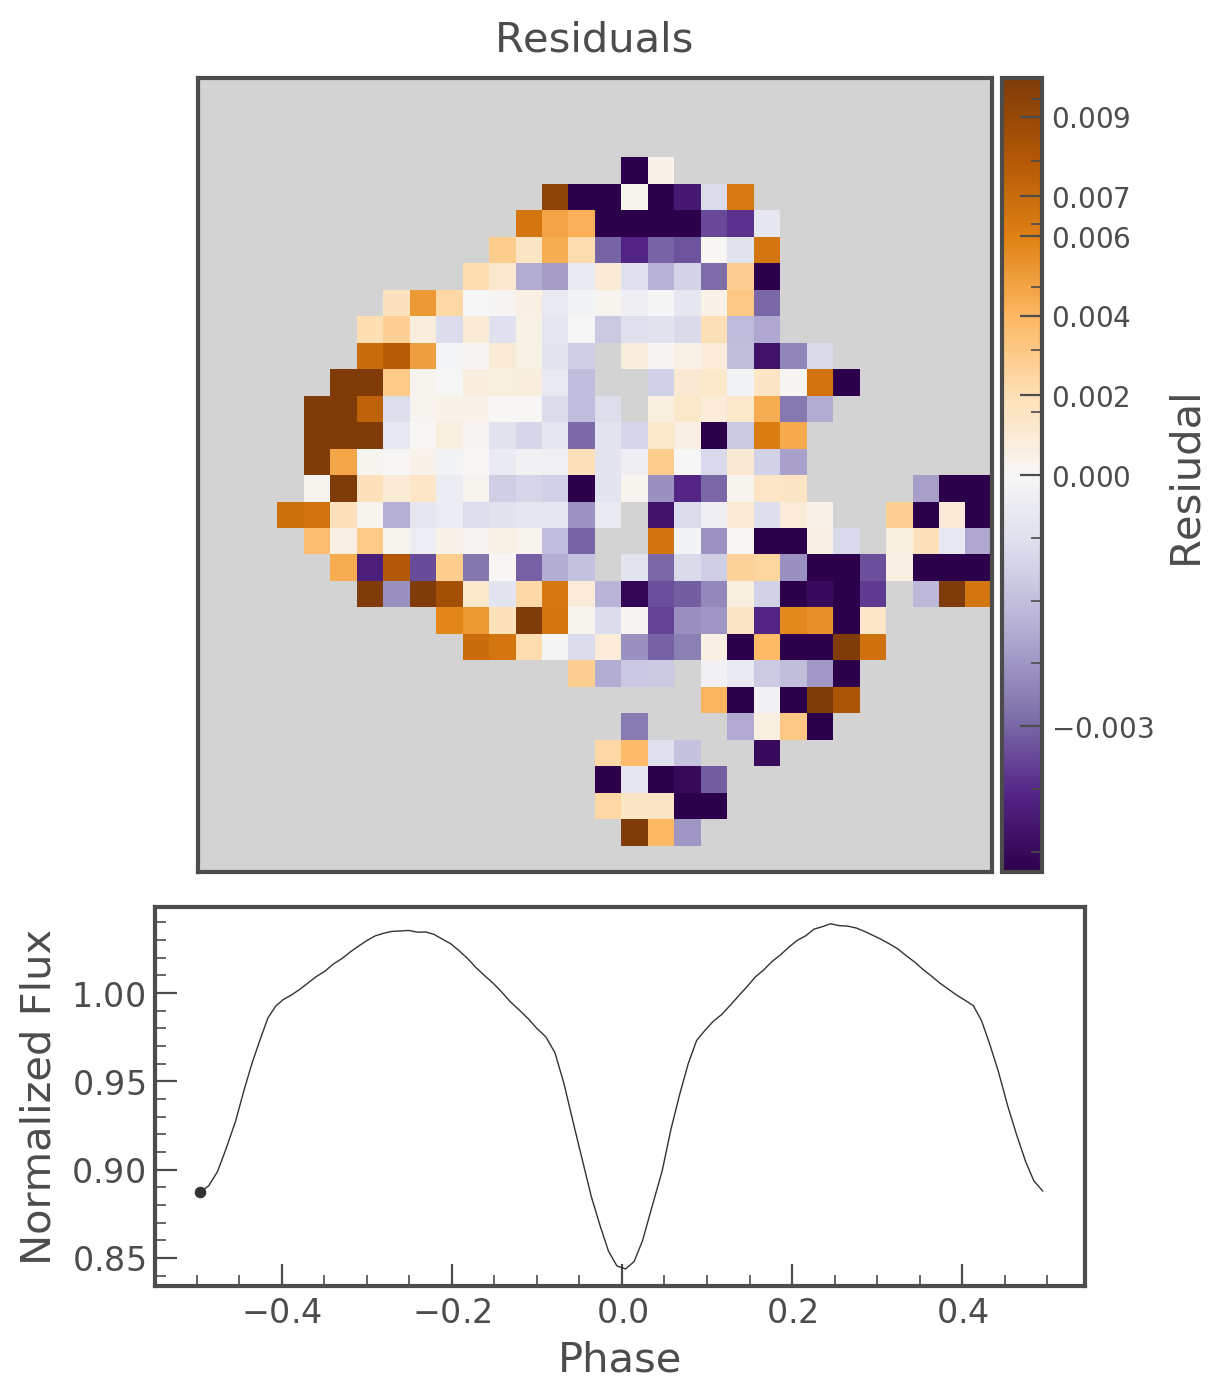

In [468]:
cmap = plt.get_cmap('PuOr_r')
aper = (model[50] < 0.95) & (model[50] > 0.8)
vmin, vmax = np.min([0, np.nanpercentile(resids[:, aper], 5)]), np.nanmax([0, np.nanpercentile(resids[:, aper], 95)])
norm = chromo.utils.MidPointNorm(midpoint=0, vmin=vmin, vmax=vmax)
cmap.set_bad('lightgrey', 0)

aper = (convolve((model[50] < 0.95), Box2DKernel(2), boundary='fill', fill_value=0) > 0.1) & (model[50] > 0.8)

chromo.utils.movie(resids/np.atleast_3d(aper).transpose([2, 0, 1]), ph, fl,
                   cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, out='DeltaPic_resids.mp4',
                   title='Residuals', cbar_label='Resiudal')

Calculating Pixel Light Curves: 100%|██████████| 60/60 [00:12<00:00,  4.86it/s]


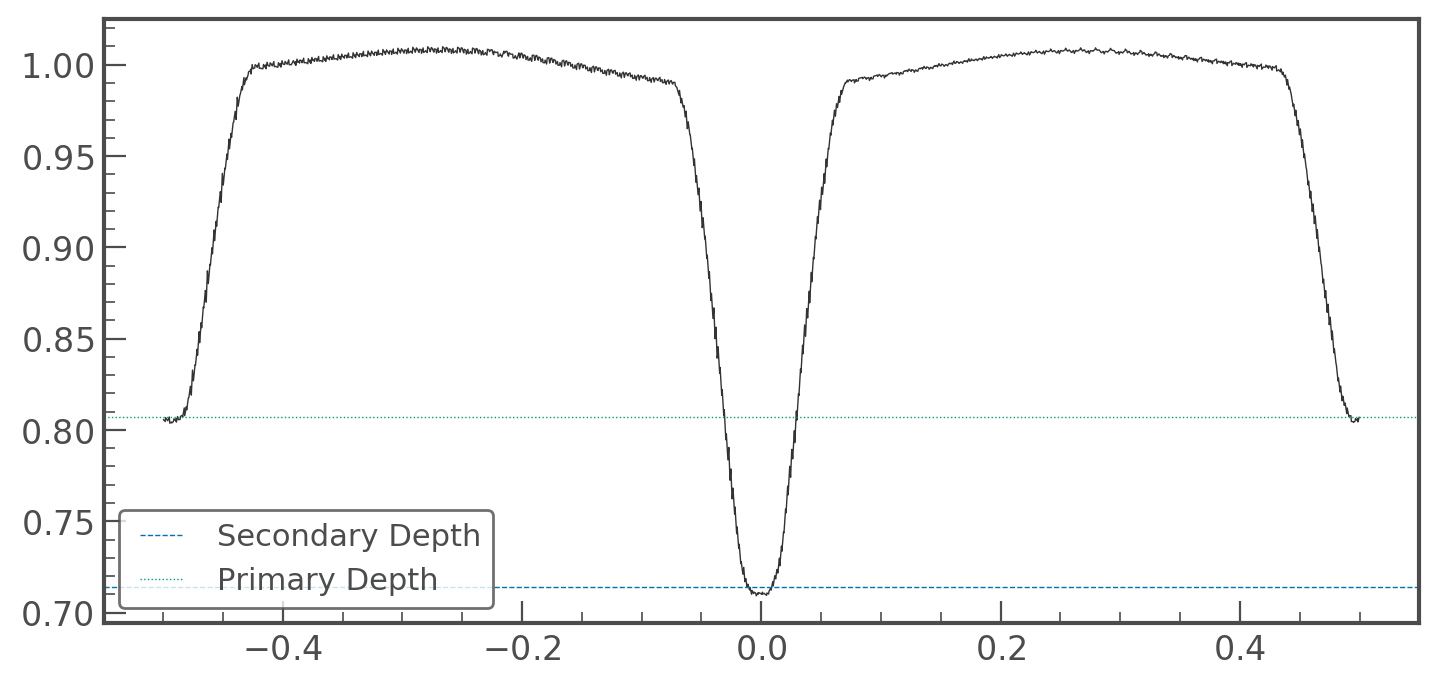

In [480]:
data, model, resids, ph, fl = eb.analyze(zp, 1.669530708135147, 0.7945727531770768)

In [529]:
aper = model[50] < 0.999
fmin, fmax = np.nanpercentile(model[:, aper], 1), np.nanmax([1, np.nanpercentile(model[:, aper], 1)])
#chromo.utils.movie(data, ph, fl, cmap='viridis', vmin=fmin, vmax=fmax, out='ZetaPhe.mp4',
#                   title='Whitened Data', cbar_label='Normalized Flux')

/Users/ch/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


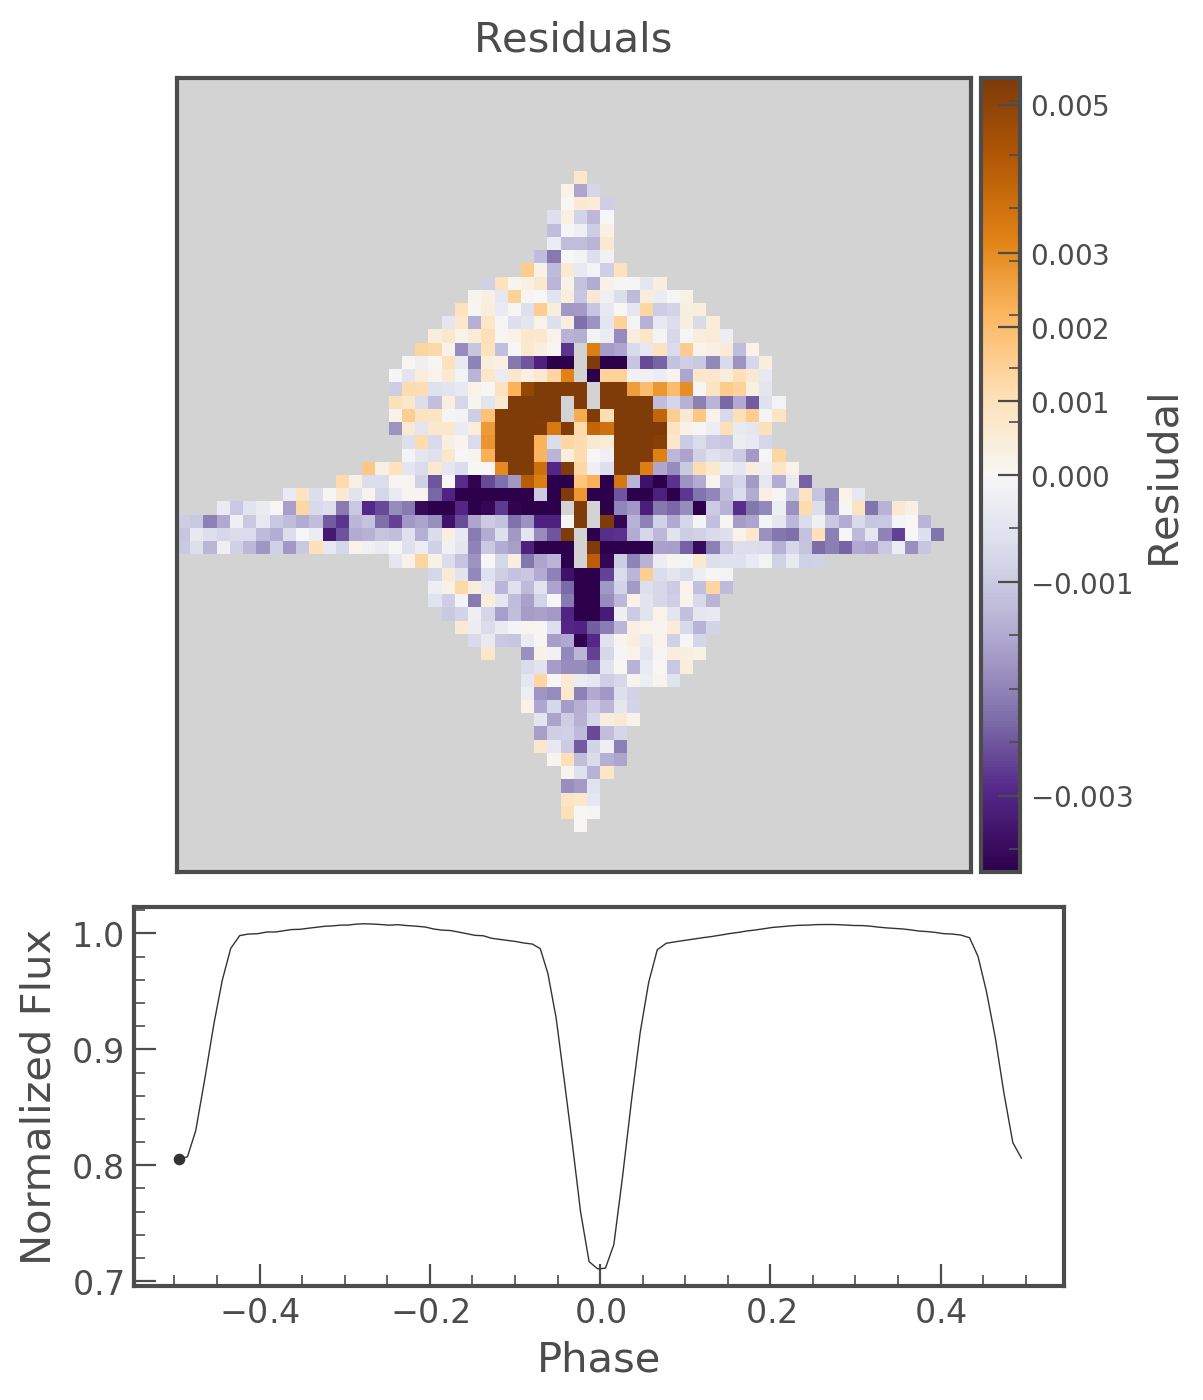

In [530]:
cmap = plt.get_cmap('PuOr_r')

aper = (model[50] < 0.99) & (model[50] > fmin*0.5)
vmin, vmax = np.min([0, np.nanpercentile(resids[:, aper], 1)]), np.nanmax([0, np.nanpercentile(resids[:, aper], 99)])
norm = chromo.utils.MidPointNorm(midpoint=0, vmin=vmin, vmax=vmax)
cmap.set_bad('lightgrey', 0)

aper = (convolve((model[50] < 0.99), Box2DKernel(2), boundary='fill', fill_value=0) > 0.1) & (model[50] > fmin*0.5)

chromo.utils.movie(resids/np.atleast_3d(aper).transpose([2, 0, 1]), ph, fl,
                   cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, out='ZetaPhe_resids.mp4',
                   title='Residuals', cbar_label='Resiudal')

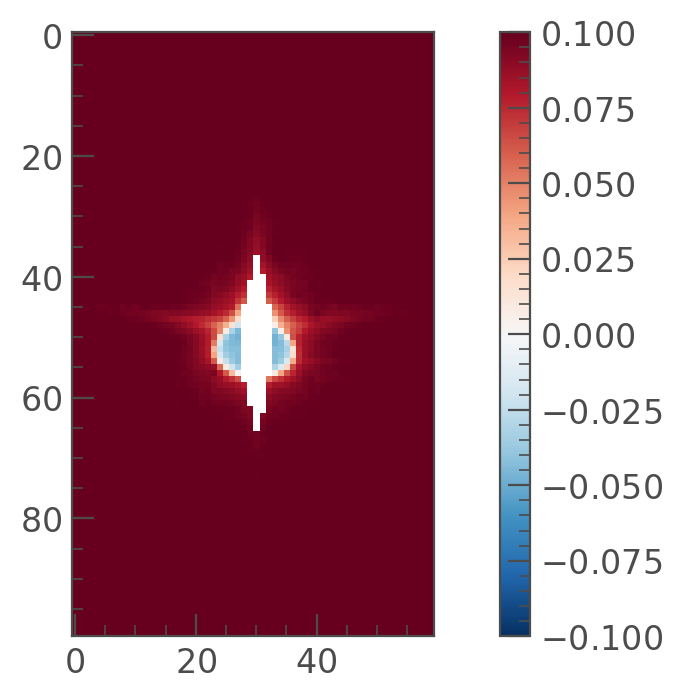

In [50]:
plt.imshow(secondary_depth_zp/primary_depth_zp - 0.73827493/0.8231774, vmax=0.1, vmin=-0.1, cmap=plt.get_cmap('RdBu_r'))
plt.colorbar()

In [ ]:
bkg = background_correction(raw_tpf)

In [ ]:
hdu = deepcopy(raw_tpf.hdu)
hdu[1].data['FLUX'] -= np.atleast_3d(bkg).transpose([1, 2, 0]) 
hdu[1].data['FLUX'] -= np.min(hdu[1].data['FLUX'])
fits.HDUList(hdus=list(hdu)).writeto('hack.fits', overwrite=True)
tpf = lk.TessTargetPixelFile('hack.fits')

In [ ]:
eb.analyze(raw_tpf, period, t0)

In [ ]:
tpf.plot(scale='log')

In [ ]:
tpf.plot()

In [ ]:
period, t0 = 1.672794, 0.5253266 

In [ ]:
f = lc.fold(period, t0)
f.scatter(c=f.time_original)

In [ ]:
test_lc = tpf.to_lightcurve()
nb = int(period*48)

ax = test_lc.plot(normalize=False)
f = test_lc.fold(period, t0)
func = interp1d(f.bin(nb/4).time, f.bin(nb/4).flux, bounds_error=False, kind='cubic', fill_value='extrapolate')
corr = func(f.time)[np.argsort(f.time_original)]
corr /= np.nanmedian(corr)
plt.figure()
plt.plot(tpf.time, corr)
test_lc /= corr

a = test_lc.bin(int(2*period*48))
a.scatter(ax=ax, normalize=False)
f = interp1d(a.time, a.flux, bounds_error=False, kind='cubic', fill_value='extrapolate')

lc = tpf.to_lightcurve()
lc /= f(tpf.time)
#lc = (lc/poly_detrend(lc, npoly=4, sigma=2).flux)
#lc = lc[60:]

lc.plot()

In [ ]:
plt.plot(bkg)

In [ ]:
(test_lc/(func(f.time)[np.argsort(f.time_original)])).plot()

In [ ]:

    plt.figure()
    plt.plot(x_fold, c_flux[:, aper], 'k.', alpha=0.01, markersize=1);
    plt.plot(true.fold(period, t0).time, true.fold(period, t0).flux, c='r', ls='--')
    plt.ylim(0, 1.5)

    plt.figure()
    plt.plot(x_fold, model_flux[:, aper], 'k.', alpha=0.01, markersize=1);
    plt.plot(true.fold(period, t0).time, true.fold(period, t0).flux, c='r', ls='--')
    plt.ylim(0, 1.5)


    all_aper = np.ones(flux.shape[1:], bool)
    norm_depth_ratio = secondary_depth[all_aper]/primary_depth[all_aper] - true_secondary_depth/true_primary_depth

    plt.figure()
    plt.hist(norm_depth_ratio[np.isfinite(norm_depth_ratio)], np.linspace(-0.3, 0.3, 50));
    plt.yscale('log')


    cmap = plt.get_cmap('RdBu')
    norm = MidPointNorm(midpoint=0, vmin=np.min([0, np.nanpercentile(norm_depth_ratio, 1)]), vmax=np.nanmax([0, np.nanpercentile(norm_depth_ratio, 99)]))
    cmap.set_bad('lightgrey', 1)

    inds = np.array_split(np.argsort(x_fold), np.linspace(0, len(x_fold), nb + 1, dtype=int))[1:-1]
    x_fold_b = np.asarray([np.median(x_fold[ind]) for ind in inds])
    c_flux_b = np.asarray([np.median(c_flux[ind, :, :], axis=0) for ind in inds])
    model_flux_b = np.asarray([np.median(model_flux[ind, :, :], axis=0) for ind in inds])
    true_flux_b = np.asarray([np.median(true.flux[ind]) for ind in inds])


    # Matplot lib stuff
    fig, ax = plt.subplots(figsize=(17, 8))

    for l, s, p in zip(c_flux_b[:, aper].T, secondary_depth[aper], primary_depth[aper]):
        c = (s/p - true_secondary_depth/true_primary_depth)
        d = (1 - p)/(1 - true_primary_depth)
        l2 = (l * (1/d) - (1/d) + 1)
        ax.plot(x_fold_b, l2, color=cmap(norm(c)), zorder=c)

    #Horrible Colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    #cbar.set_label('Measured Secondary Depth/\nTrue Secondary Depth')
    ax.set_ylabel('Pixel Light Curves')


    # Matplot lib stuff
    fig, ax = plt.subplots(figsize=(17, 8))

    for l, m, s, p in zip(c_flux_b[:, aper].T, model_flux_b[:, aper].T, secondary_depth[aper], primary_depth[aper]):
        c = (s/p - true_secondary_depth/true_primary_depth)
        ax.plot(x_fold_b, (l/m) - np.nanmedian(l/m), color=cmap(norm(c)), zorder=c)

    #Horrible Colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    #cbar.set_label('Measured Secondary Depth/\nTrue Secondary Depth')
    ax.set_ylabel('Pixel Light Curves')
    ax.axvline(0, ls='--', color='k')
    ax.text(0, 1.02, 'PRIMARY', ha='center')